In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import plotly.io as pio
pio.renderers.default='notebook'

from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import (accuracy_score, 
                            classification_report,
                            recall_score, precision_score, f1_score,
                            confusion_matrix)


from mlxtend.evaluate import mcnemar_table, mcnemar_tables
from mlxtend.plotting import checkerboard_plot, plot_decision_regions
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
# from mlxtend.evaluate import bias_variance_decomp
from sklearn.decomposition import PCA
%matplotlib inline

sns.set_style('darkgrid')
pd. set_option("display.max_columns", None)

import warnings
warnings.filterwarnings('ignore')

# Import data

In [67]:
df = pd.read_csv("RTA Dataset.csv")

In [68]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df.sample(5))

Time Day_of_week Age_band_of_driver Sex_of_driver  \
3947  10:01:00      Friday              18-30          Male   
5670  14:30:00    Saturday              18-30          Male   
9800   7:35:00    Thursday              18-30          Male   
2582  11:30:00   Wednesday            Unknown          Male   
8939  15:04:00   Wednesday              31-50          Male   

       Educational_level Vehicle_driver_relation Driving_experience  \
3947  Junior high school                Employee         Above 10yr   
5670  Junior high school                Employee         Above 10yr   
9800   Elementary school                Employee              2-5yr   
2582  Junior high school                Employee              1-2yr   
8939  Junior high school                Employee              2-5yr   

        Type_of_vehicle Owner_of_vehicle Service_year_of_vehicle  \
3947              Other            Owner               Below 1yr   
5670  Public (12 seats)            Owner                     NaN   
9800         Automobile            Owner              Above 10yr   
2582         Automobile              NaN                     NaN   
8939         Automobile            Owner                 5-10yrs   

     Defect_of_vehicle Area_accident_occured  \
3947               NaN          Church areas   
5670               NaN          Office areas   
9800         No defect          School areas   
2582               NaN                 Other   
8939         No defect          Church areas   

                                      Lanes_or_Medians  \
3947                                 Undivided Two way   
5670  Two-way (divided with broken lines road marking)   
9800                                 Undivided Two way   
2582                                 Undivided Two way   
8939                                           Unknown   

                                Road_allignment Types_of_Junction  \
3947             Tangent road with flat terrain           Y Shape   
5670             Tangent road with flat terrain           Y Shape   
9800             Tangent road with flat terrain           Y Shape   
2582             Tangent road with flat terrain          Crossing   
8939  Tangent road with mountainous terrain and       No junction   

     Road_surface_type Road_surface_conditions       Light_conditions  \
3947     Asphalt roads                     Dry               Daylight   
5670       Earth roads                     Dry               Daylight   
9800     Asphalt roads             Wet or damp  Darkness - lights lit   
2582     Asphalt roads                     Dry               Daylight   
8939     Asphalt roads                     Dry               Daylight   

     Weather_conditions                Type_of_collision  \
3947             Normal   Vehicle with vehicle collision   
5670             Normal  Collision with roadside objects   
9800            Raining       Collision with pedestrians   
2582             Normal  Collision with roadside objects   
8939             Normal   Vehicle with vehicle collision   

      Number_of_vehicles_involved  Number_of_casualties Vehicle_movement  \
3947                            2                     2   Going straight   
5670                            3                     1   Going straight   
9800                            2                     1      Getting off   
2582                            2                     1  Moving Backward   
8939                            2                     3        Reversing   

       Casualty_class Sex_of_casualty Age_band_of_casualty Casualty_severity  \
3947  Driver or rider            Male                31-50                 3   
5670  Driver or rider            Male                18-30                 3   
9800  Driver or rider            Male             Under 18                 3   
2582  Driver or rider            Male              Over 51                 2   
8939  Driver or rider            Male              Over 51                 3   

    

# Exploratory Data Analysis

In [69]:
df.shape

(12316, 32)

In [70]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [71]:
col_map={
    'Time': 'time',
    'Day_of_week': 'day_of_week',
    'Age_band_of_driver': 'driver_age',
    'Sex_of_driver': 'driver_sex',
    'Educational_level': 'educational_level',
    'Vehicle_driver_relation': 'vehicle_driver_relation',
    'Driving_experience': 'driving_experience',
    'Type_of_vehicle': 'vehicle_type',
    'Owner_of_vehicle': 'vehicle_owner',
    'Service_year_of_vehicle': 'service_year',
    'Defect_of_vehicle': 'vehicle_defect',
    'Area_accident_occured': 'accident_area',
    'Lanes_or_Medians': 'lanes',
    'Road_allignment': 'road_allignment',
    'Types_of_Junction': 'junction_type',
    'Road_surface_type': 'surface_type',
    'Road_surface_conditions': 'road_surface_conditions',
    'Light_conditions': 'light_condition',
    'Weather_conditions': 'weather_condition',
    'Type_of_collision': 'collision_type',
    'Number_of_vehicles_involved': 'vehicles_involved',
    'Number_of_casualties': 'casualties',
    'Vehicle_movement': 'vehicle_movement',
    'Casualty_class': 'casualty_class',
    'Sex_of_casualty': 'casualty_sex' , 
    'Age_band_of_casualty': 'casualty_age', 
    'Casualty_severity': 'casualty_severity',
    'Work_of_casuality': 'casualty_work', 
    'Fitness_of_casuality': 'casualty_fitness',
    'Pedestrian_movement': 'pedestrian_movement',
    'Cause_of_accident': 'accident_cause',
    'Accident_severity': 'accident_severity'
}
df.rename(columns=col_map, inplace=True)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   time                     12316 non-null  object
 1   day_of_week              12316 non-null  object
 2   driver_age               12316 non-null  object
 3   driver_sex               12316 non-null  object
 4   educational_level        11575 non-null  object
 5   vehicle_driver_relation  11737 non-null  object
 6   driving_experience       11487 non-null  object
 7   vehicle_type             11366 non-null  object
 8   vehicle_owner            11834 non-null  object
 9   service_year             8388 non-null   object
 10  vehicle_defect           7889 non-null   object
 11  accident_area            12077 non-null  object
 12  lanes                    11931 non-null  object
 13  road_allignment          12174 non-null  object
 14  junction_type            11429 non-nul

In [73]:
def unistats(df):
    import pandas as pd
    output_df = pd.DataFrame(columns=['Count', 'Missing', 'Unique', 'Dtype', 'Numeric','Mode', 'Mean', 'Min', '25%', 'Median', '75%', 'Max', 'Std', 'Skew', 'Kurt'])
    
    for col in df:
        if pd.api.types.is_numeric_dtype(df[col]):
            output_df.loc[col] = [df[col].count(), df[col].isnull().sum(), df[col].nunique(),
                                  df[col].dtype, pd.api.types.is_numeric_dtype(df[col]), df[col].mode().values[0], df[col].mean(), df[col].min(),
                                  df[col].quantile(0.25), df[col].median(), df[col].quantile(0.75), 
                                  df[col].max(), df[col].std(), df[col].skew(), df[col].kurt()]
        else:
            output_df.loc[col] = [df[col].count(), df[col].isnull().sum(), df[col].nunique(),
                                  df[col].dtype, pd.api.types.is_numeric_dtype(df[col]), df[col].mode().values[0], '-', '-', 
                                  '-', '-', '-',
                                  '-', '-', '-', '-']
            
    return output_df.sort_values(by = ['Numeric', 'Skew', 'Unique'], ascending = False)

In [74]:
unistats(df)

Count  Missing  Unique   Dtype  Numeric  \
casualties               12316        0       8   int64     True   
vehicles_involved        12316        0       6   int64     True   
time                     12316        0    1074  object    False   
accident_cause           12316        0      20  object    False   
vehicle_type             11366      950      17  object    False   
accident_area            12077      239      14  object    False   
vehicle_movement         12008      308      13  object    False   
collision_type           12161      155      10  object    False   
road_allignment          12174      142       9  object    False   
weather_condition        12316        0       9  object    False   
pedestrian_movement      12316        0       9  object    False   
junction_type            11429      887       8  object    False   
day_of_week              12316        0       7  object    False   
educational_level        11575      741       7  object    False   
driving_experience       11487      829       7  object    False   
lanes                    11931      385       7  object    False   
casualty_work             9118     3198       7  object    False   
service_year              8388     3928       6  object    False   
casualty_age             12316        0       6  object    False   
driver_age               12316        0       5  object    False   
surface_type             12144      172       5  object    False   
casualty_fitness          9681     2635       5  object    False   
vehicle_driver_relation  11737      579       4  object    False   
vehicle_owner            11834      482       4  object    False   
road_surface_conditions  12316        0       4  object    False   
light_condition          12316        0       4  object    False   
casualty_class           12316        0       4  object    False   
casualty_severity        12316        0       4  object    False   
driver_sex               12316        0       3  object    False   
vehicle_defect            7889     4427       3  object    False   
casualty_sex             12316        0       3  object    False   
accident_severity        12316        0       3  object    False   

                                                                     Mode  \
casualties                                                              1   
vehicles_involved                                                       2   
time                                                             15:30:00   
accident_cause                                              No distancing   
vehicle_type                                                   Automobile   
accident_area                                                       Other   
vehicle_movement                                           Going straight   
collision_type                             Vehicle with vehicle collision   
road_allignment                            Tangent road with flat terrain   
weather_condition                                                  Normal   
pedestrian_movement                                      Not a Pedestrian   
junction_type                                                     Y Shape   
day_of_week                                                        Friday   
educational_level                                      Junior high school   
driving_experience                                                 5-10yr   
lanes                    Two-way (divided with broken lines road marking)   
casualty_work                                                      Driver   
service_year                                                      Unknown   
casualty_age                                                           na   
driver_age                                                          18-30   
surface_type                                                Asphalt roads   
casualty_fitness                                                   Normal   
vehicle_d

In [75]:
print("Number of duplicates: ", df.duplicated().sum())

Number of duplicates:  0


In [76]:
for i in df.columns:
    print(f"Unique value in {i}:")
    print(df[i].unique(),'\n')

Unique value in time:
['17:02:00' '1:06:00' '14:15:00' ... '7:24:00' '19:18:00' '2:47:00'] 

Unique value in day_of_week:
['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday'] 

Unique value in driver_age:
['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown'] 

Unique value in driver_sex:
['Male' 'Female' 'Unknown'] 

Unique value in educational_level:
['Above high school' 'Junior high school' nan 'Elementary school'
 'High school' 'Unknown' 'Illiterate' 'Writing & reading'] 

Unique value in vehicle_driver_relation:
['Employee' 'Unknown' 'Owner' nan 'Other'] 

Unique value in driving_experience:
['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' nan 'No Licence' 'Below 1yr'
 'unknown'] 

Unique value in vehicle_type:
['Automobile' 'Public (> 45 seats)' 'Lorry (41?100Q)' nan
 'Public (13?45 seats)' 'Lorry (11?40Q)' 'Long lorry' 'Public (12 seats)'
 'Taxi' 'Pick up upto 10Q' 'Stationwagen' 'Ridden horse' 'Other' 'Bajaj'
 'Turbo' 'Motorcycle' 'Special vehicle' 'Bicycle'] 

Unique value

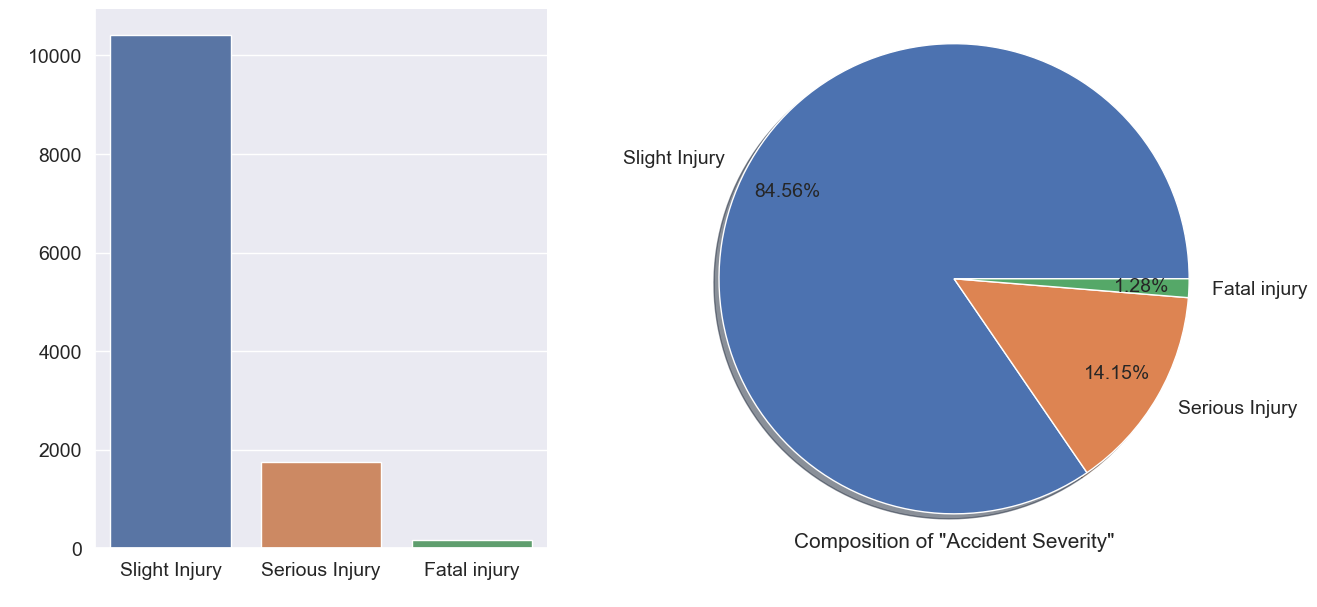

In [77]:
# checking the target
plt.figure(figsize=(14,7))
# barplot
ax1 = plt.subplot(1,2,1)
cp = sns.countplot(x=df["accident_severity"])
ax1.set_xlabel(" ")
ax1.set_ylabel(" ")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True, right=True)
# pieplot
ax2 = plt.subplot(1,2,2)
plt.pie(df["accident_severity"].value_counts(),
        labels=list(df["accident_severity"].unique()),
        autopct='%1.2f%%',
        pctdistance=0.8,
        shadow=True,
        radius=1.3,
        textprops={'fontsize':14}
       )
ax2.set_xlabel(" ")
plt.xlabel('Composition of "Accident Severity"', fontsize=15, labelpad=20)
plt.subplots_adjust(wspace=0.4)
plt.show()

In [78]:
fig = px.treemap(df, path=['accident_cause'], width=800, height=400)
fig.update_layout(
    margin = dict(t=50, l=25, r=25, b=25))
# fig.show()

py.init_notebook_mode(connected=True)
py.iplot(fig,filename= "treemap")

In [79]:
# converting 'time' to datetime
df['time'] = pd.to_datetime(df['time'])

# date (day-month-year) time
df["time"].dt.hour

# extracting hour and minute from timestamp
df['hour'] = df['time'].dt.hour
df['minute'] = df['time'].dt.minute
df.drop('time', axis=1, inplace=True)

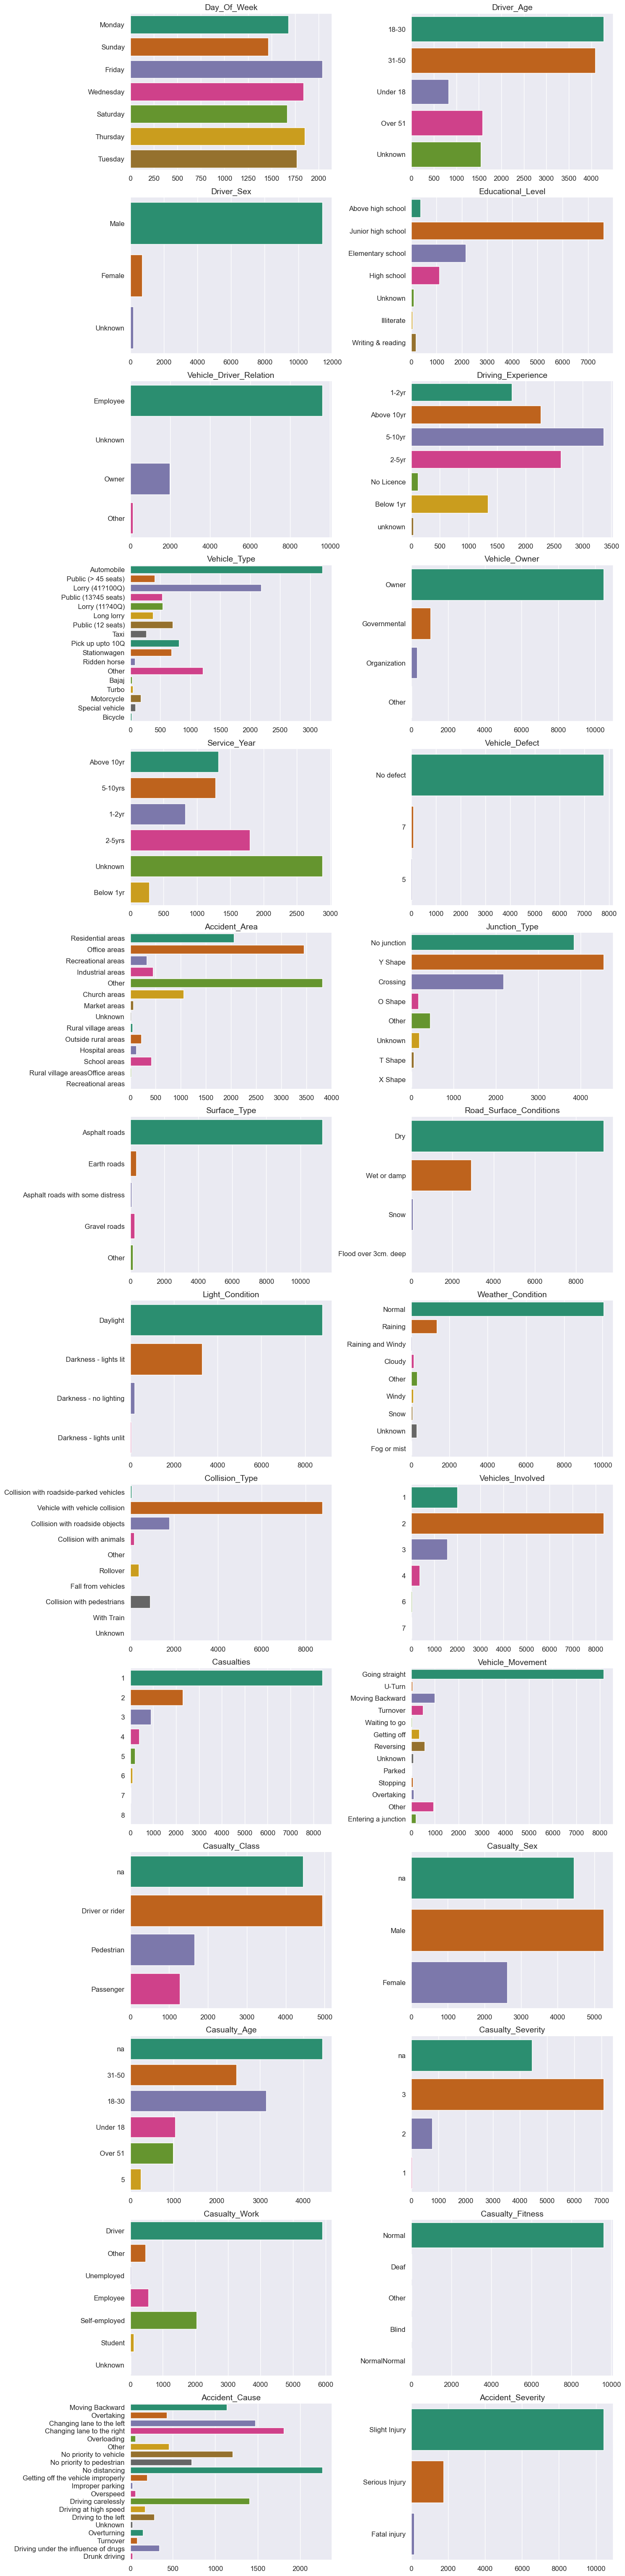

In [80]:
plt.figure(figsize=(15,70))
plotnumber = 1

for col in df.drop(['hour', 'minute', 'lanes', 'road_allignment', 'pedestrian_movement'], axis=1):
    if plotnumber <= df.shape[1]:
        ax1 = plt.subplot(16,2,plotnumber)
        sns.countplot(data=df, y=col, palette='Dark2')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title(col.title(), fontsize=14)
        plt.xlabel('')
        plt.ylabel('')
    plotnumber +=1
plt.tight_layout()

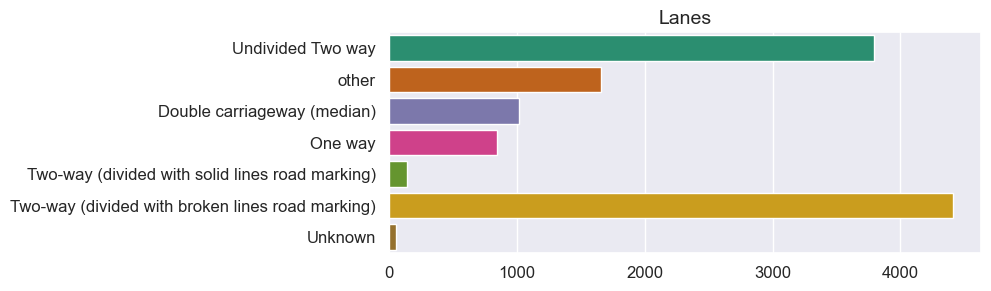

In [81]:
plt.figure(figsize=(10,3))
sns.countplot(data=df, y='lanes', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Lanes', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

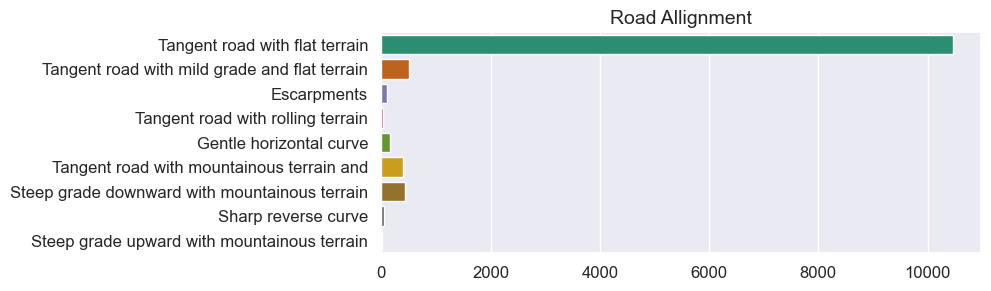

In [82]:
plt.figure(figsize=(10,3))
sns.countplot(data=df, y='road_allignment', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Road Allignment', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

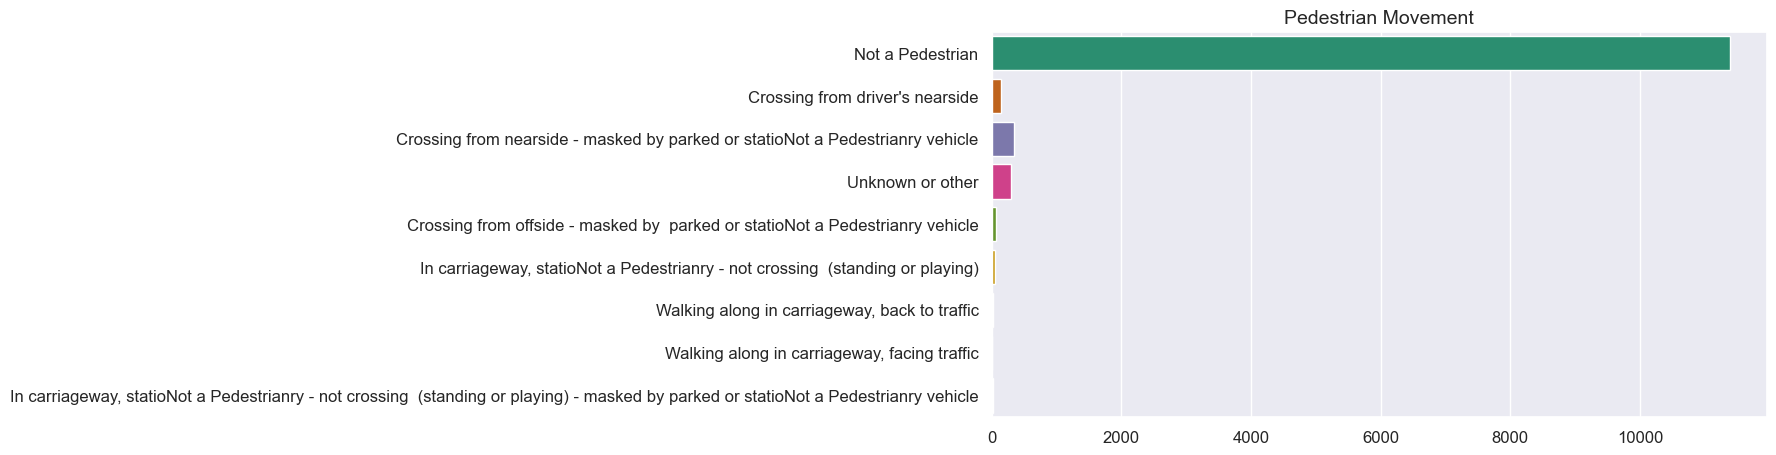

In [83]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='pedestrian_movement', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Pedestrian Movement', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

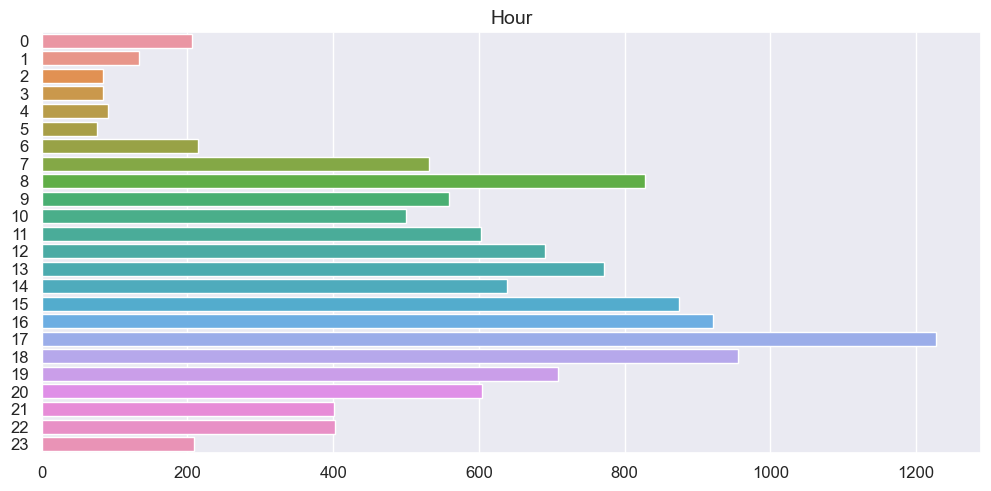

In [84]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='hour')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Hour', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

# Observation

1. Most accidents occured during evening
2. Mostly males were involved in the accident
3. 2 vehicle accident occured majorily
4. Majority of the accident were not severe
5. Most Fatal injuries occur on weekends

# Preprocessing

In [85]:
# dropping columns that can cause imbalance while imputation
df.drop(columns = ['vehicle_defect', 'vehicle_driver_relation', 'casualty_work', 'casualty_fitness'], inplace=True)

In [86]:
impute_cols = [x for x in df.isna().sum()[df.isna().sum() != 0].index.tolist()]
for feat in impute_cols:
    mode = df[feat].mode()[0]
    df[feat].fillna(mode, inplace=True)

In [87]:
df.isna().sum() 

day_of_week                0
driver_age                 0
driver_sex                 0
educational_level          0
driving_experience         0
vehicle_type               0
vehicle_owner              0
service_year               0
accident_area              0
lanes                      0
road_allignment            0
junction_type              0
surface_type               0
road_surface_conditions    0
light_condition            0
weather_condition          0
collision_type             0
vehicles_involved          0
casualties                 0
vehicle_movement           0
casualty_class             0
casualty_sex               0
casualty_age               0
casualty_severity          0
pedestrian_movement        0
accident_cause             0
accident_severity          0
hour                       0
minute                     0
dtype: int64

# Hypothesis testing

In [88]:
def anova(df, feature, label):
    import pandas as pd
    import numpy as np
    from scipy import stats
    
    groups = df[feature].unique()
    df_grouped = df.groupby(feature)
    group_labels = []
    for g in groups:
        g_list = df_grouped.get_group(g)
        group_labels.append(g_list[label])
        
    return stats.f_oneway(*group_labels)    


def Chisquare(df, feature, label):
    import pandas as pd
    import scipy.stats
    ct = pd.crosstab(index = df[feature], columns=df[label])
    chi2, p,dof,_ = scipy.stats.chi2_contingency([ct.iloc[0].values, ct.iloc[1].values])
    return chi2,p
    
    
def T(df, feature, label): 
    import pandas as pd
    import numpy as np
    from scipy import stats
    partial_high_school = df[df[feature] == (df[feature].unique()[0])]
    high_school = df[df[feature] == (df[feature].unique()[1])]
    t, p = stats.ttest_ind(partial_high_school[label],high_school[label] )
    return t,p

def bivstats(df, label):
    from scipy import stats
    import pandas as pd
    import numpy as np
    
#   Create an empty Dataframe to store the output
    output_df = pd.DataFrame(columns = ['Stat_r', '+/-_F', 'Effect_size_X^2', 'p-value'])
    
    for col in df:
        if not col == label:
            if df[col].isnull().sum() == 0:
                if pd.api.types.is_numeric_dtype(df[col]) and pd.api.types.is_numeric_dtype(df[label]):
                    r, p = stats.pearsonr(df[label], df[col])
                    if r > 0:
                        output_df.loc[col] = ['r', '+', abs(round(r, 3)), round(p, 6)]
                    else:
                        output_df.loc[col] = ['r', '-', abs(round(r, 3)), round(p, 6)]
                elif((pd.api.types.is_numeric_dtype(df[label])) and not (pd.api.types.is_numeric_dtype(df[col])) and (df[col].nunique()==2)):
                        t, p = T(df[[col,label]],col,label)
                        output_df.loc[col] = ['t','',round(t,3),round(p,6) ]
                elif((pd.api.types.is_numeric_dtype(df[col])) and not (pd.api.types.is_numeric_dtype(df[label])) and (df[label].nunique()==2)):
                        t, p = T(df[[col, label]],label,col)
                        output_df.loc[col] = ['t','',round(t,3),round(p,6) ]
                elif (pd.api.types.is_numeric_dtype(df[label]) and not pd.api.types.is_numeric_dtype(df[col]) and df[col].nunique()!=2):
                    F, p = anova(df[[col, label]],col,label)
                    output_df.loc[col] = ['F','',round(F,3),round(p,6) ]
                elif  (pd.api.types.is_numeric_dtype(df[col]) and not pd.api.types.is_numeric_dtype(df[label])):
                    F, p = anova(df[[col, label]],label,col)
                    output_df.loc[col] = ['F','',round(F,3),round(p,6) ]
                elif (not pd.api.types.is_numeric_dtype(df[label]) and not pd.api.types.is_numeric_dtype(df[col]) ):
                    try:
                        X, p = Chisquare(df[[col, label]],col,label)
                        output_df.loc[col] = ['X','',round(X,3),round(p,6) ]
                    except:
                        pass
            else:
                output_df.loc[col] = [np.nan, np.nan, np.nan, 'Nulls']
    
    return output_df.sort_values(by=['Effect_size_X^2','Stat_r'],ascending=[False,False])

In [89]:
bivstats(df,'accident_severity')

Stat_r +/-_F  Effect_size_X^2   p-value
vehicles_involved            F                 58.009  0.000000
casualties                   F                 50.091  0.000000
junction_type                X                 36.677  0.000000
day_of_week                  X                  8.010  0.018221
minute                       F                  6.257  0.001923
casualty_age                 X                  4.711  0.094839
driving_experience           X                  4.684  0.096122
casualty_sex                 X                  3.570  0.167777
hour                         F                  3.172  0.041959
pedestrian_movement          X                  2.658  0.264708
lanes                        X                  2.638  0.267446
driver_sex                   X                  2.140  0.342935
casualty_class               X                  2.051  0.358639
surface_type                 X                  1.991  0.369515
driver_age                   X                  1.767  0.413243
service_year                 X                  1.190  0.551640
light_condition              X                  1.124  0.570004
collision_type               X                  1.082  0.582087
accident_area                X                  1.048  0.592220
vehicle_type                 X                  0.738  0.691552
road_allignment              X                  0.427  0.807906
casualty_severity            X                  0.382  0.826001
road_surface_conditions      X                  0.368  0.831753
accident_cause               X                  0.358  0.836186
vehicle_movement             X                  0.299  0.860957
educational_level            X                  0.208  0.901101
vehicle_owner                X                  0.149  0.928145

## Do weekends account for more accidents

In [91]:
df.pivot_table(values='casualties',index='day_of_week', columns='accident_severity', aggfunc='sum')

accident_severity  Fatal injury  Serious Injury  Slight Injury
day_of_week                                                   
Friday                       35             496           2613
Monday                       16             347           2208
Saturday                    105             399           2242
Sunday                      119             299           2288
Thursday                     25             405           2291
Tuesday                      35             393           2160
Wednesday                    35             337           2219

In [93]:
ff = pd.crosstab(index=df['day_of_week'], columns=df['accident_severity'], margins=True)
ff

accident_severity  Fatal injury  Serious Injury  Slight Injury    All
day_of_week                                                          
Friday                       16             313           1712   2041
Monday                       12             204           1465   1681
Saturday                     37             245           1384   1666
Sunday                       35             190           1242   1467
Thursday                     22             272           1557   1851
Tuesday                      17             257           1496   1770
Wednesday                    19             262           1559   1840
All                         158            1743          10415  12316

In [94]:
print('Accident percentage on weekdays:',round(sum([ff.iloc[i,3] for i in range(0,7) if ff.index[i] not in ['Saturday','Sunday']])/ff.iloc[7,3],2))
print('Accident percentage on weekends:',round(sum([ff.iloc[i,3] for i in range(0,7) if ff.index[i] in ['Saturday','Sunday']])/ff.iloc[7,3],2))

Accident percentage on weekdays: 0.75
Accident percentage on weekends: 0.25


In [96]:
print('Accident percentage on weekdays:',round(sum([ff.iloc[i,0] for i in range(0,7) if ff.index[i] not in ['Saturday','Sunday']])/ff.iloc[7,0],2))
print('Accident percentage on weekends:',round(sum([ff.iloc[i,0] for i in range(0,7) if ff.index[i] in ['Saturday','Sunday']])/ff.iloc[7,0],2))

Accident percentage on weekdays: 0.54
Accident percentage on weekends: 0.46


### Observation 
fatal accidents occur more on weekends

In [99]:
def ordinal_encoder(df, feats): 
    for feat in feats:    
        feat_val = list(np.arange(df[feat].nunique()))
        feat_key = list(df[feat].sort_values().unique())
        feat_dict = dict(zip(feat_key, feat_val))
        df[feat] = df[feat].map(feat_dict)
    return df

df1 = ordinal_encoder(df, df.drop(['accident_severity'], axis=1).columns)
df1.shape

(12316, 29)

<Axes: >

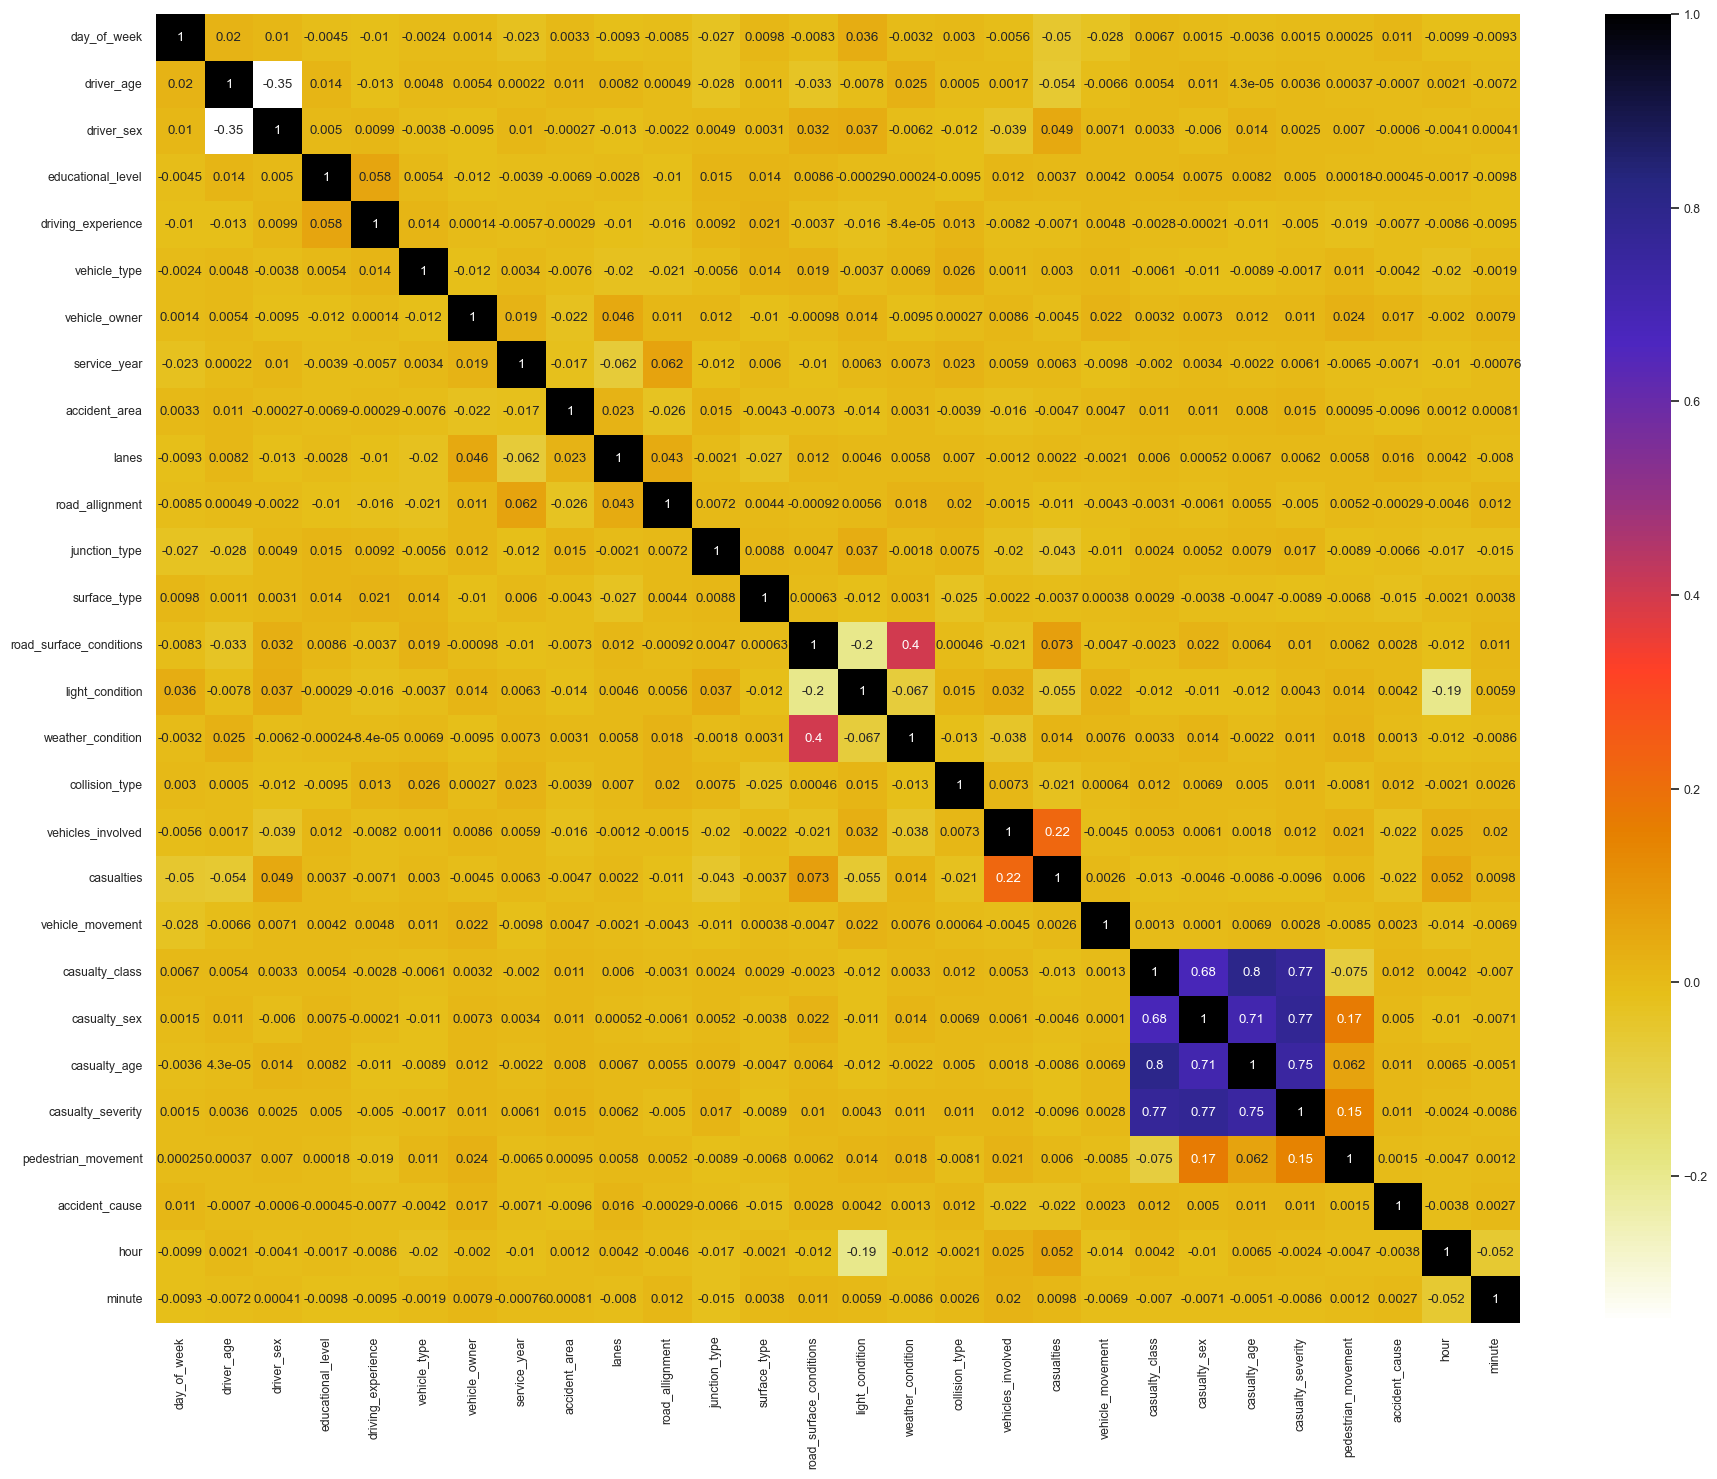

In [100]:
plt.figure(figsize=(22,17))
sns.set(font_scale=0.8)
sns.heatmap(df1.corr(), annot=True, cmap=plt.cm.CMRmap_r)

# Upsampling

In [101]:
X = df1.drop('accident_severity', axis=1)
y = df1['accident_severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8621, 28) (3695, 28) (8621,) (3695,)


In [102]:
# upsampling using smote

counter = Counter(y_train)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

counter = Counter(y_train)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

print("=============================")

print("Upsampled data shape: ", X_train.shape, y_train.shape)

Class= Slight Injury, n=7324 (84.96%)
Class= Serious Injury, n=1191 (13.82%)
Class= Fatal injury, n=106 (1.23%)
Class= Slight Injury, n=7324 (33.33%)
Class= Serious Injury, n=7324 (33.33%)
Class= Fatal injury, n=7324 (33.33%)
Upsampled data shape:  (21972, 28) (21972,)


In [103]:
y_test = ordinal_encoder(pd.DataFrame(y_test, columns = ['accident_severity']), pd.DataFrame(y_test, columns = ['accident_severity']).columns)['accident_severity']
y_train = ordinal_encoder(pd.DataFrame(y_train, columns = ['accident_severity']), pd.DataFrame(y_train, columns = ['accident_severity']).columns)['accident_severity']

In [104]:
def modelling(X_train, y_train, X_test, y_test, **kwargs):
    scores = {}
    models = []
    bvd = {}
    if 'xgb' in kwargs.keys() and kwargs['xgb']:
        xgb = XGBClassifier()
        xgb.fit(X_train._get_numeric_data(), np.ravel(y_train, order='C'))
        y_pred = xgb.predict(X_test._get_numeric_data())
        scores['xgb']= [accuracy_score(y_test, y_pred)]
        models.append(xgb)


    if 'rf' in kwargs.keys() and kwargs['rf']:
        rf = RandomForestClassifier(n_estimators=200)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        scores['rf']= [accuracy_score(y_test, y_pred)]
        models.append(rf)

    if 'extree' in kwargs.keys() and kwargs['extree']:
        extree = ExtraTreesClassifier()
        extree.fit(X_train, y_train)
        y_pred = extree.predict(X_test)
        scores['extree'] = [accuracy_score(y_test, y_pred)]
        models.append(extree)
        
    return scores,models

In [107]:
scores,models = modelling(X_train,y_train, X_test, y_test, xgb=True, rf=True, extree=True)
print(scores)

{'xgb': [0.8062246278755074], 'rf': [0.8027063599458728], 'extree': [0.8100135317997293]}


In [108]:
def model_performance(model, y_test, y_hat) : 
    conf_matrix = confusion_matrix(y_test, y_hat)
    trace1 = go.Heatmap(z = conf_matrix  ,x = ["0 (pred)","1 (pred)", "2 (pred)"],
                        y = ["0 (true)","1 (true)", "2 (true)"],xgap = 2, ygap = 2, 
                        colorscale = 'Viridis', showscale  = False)

    #Show metrics
    Accuracy  =  accuracy_score(y_test, y_hat)
    Precision =  precision_score(y_test, y_pred, average= 'weighted')
    Recall    =  recall_score(y_test, y_pred, average= 'weighted')
    F1_score  =  f1_score(y_test, y_pred, average= 'weighted')

    show_metrics = pd.DataFrame(data=[[Accuracy , Precision, Recall, F1_score]])
    show_metrics = show_metrics.T

    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue']
    trace2 = go.Bar(x = (show_metrics[0].values), 
                   y = ['Accuracy', 'Precision', 'Recall', 'F1_score'], text = np.round_(show_metrics[0].values,4),
                    textposition = 'auto',
                   orientation = 'h', opacity = 0.8,marker=dict(
            color=colors,
            line=dict(color='#000000',width=1.5)))
 
     
    #plots
    model = model
    
    #Subplots
    fig = tls.make_subplots(rows=2, cols=1, print_grid=False, 
                          subplot_titles=('Confusion Matrix',
                                        'Metrics',
                                        ))
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,2,1)
    
    fig['layout'].update(showlegend = False, title = '<b>Model performance report</b><br>'+str(model),
                        autosize = True, height = 800,width = 800,
                        plot_bgcolor = 'rgba(240,240,240, 0.95)',
                        paper_bgcolor = 'rgba(240,240,240, 0.95)',
                        # margin = dict(b = 100)
                        )
    fig.layout.titlefont.size = 14
    
    py.iplot(fig,filename='model-performance')

In [109]:
extree = ExtraTreesClassifier()
extree.fit(X_train, y_train)
y_pred = extree.predict(X_test)

In [110]:
extree.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [111]:
model_performance(extree,y_test, y_pred)

In [112]:
gkf2 = KFold(n_splits=3, shuffle=True, random_state=101).split(X=X_train, y=y_train)

params2 = {
    'max_depth': [11,15],
    'min_samples_split': [2,3],
    'class_weight': ['balanced', None],

}

extree2 = ExtraTreesClassifier(ccp_alpha = 0.0,
                                criterion = 'gini',
                                max_depth = 11,
                                min_samples_split = 3)

gsearch2 = GridSearchCV(
    estimator= extree2,
    param_grid= params2,
    scoring='f1_weighted',
    n_jobs=-1,
    cv=gkf2,
    verbose=3,
)

extree_model2 = gsearch2.fit(X=X_train, y=y_train)

(gsearch2.best_params_, gsearch2.best_score_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


({'class_weight': None, 'max_depth': 15, 'min_samples_split': 2},
 0.918865658932539)

In [113]:
extree_tuned = ExtraTreesClassifier(ccp_alpha = 0.0,
                                criterion = 'gini',
                                min_samples_split = 2,
                                class_weight = 'balanced',
                                max_depth = 15,
                                n_estimators = 400)

extree_tuned.fit(X_train, y_train)

ExtraTreesClassifier(class_weight='balanced', max_depth=15, n_estimators=400)

### Trying an automl library

In [115]:
from flaml import AutoML

In [142]:
# %%script false --no-raise-error
# Initialize an AutoML instance
automl = AutoML()

# Specify automl goal and constraint
automl_settings = {
    "time_budget": 60,  # in seconds
    "metric": 'macro_f1',
    "task": 'classification',
    "log_file_name": 'accidentml.log', 
}

In [143]:
automl.fit(
    X_train=X_train,
    y_train=y_train,
    **automl_settings
)

[flaml.automl.logger: 05-18 17:33:23] {1693} INFO - task = classification
[flaml.automl.logger: 05-18 17:33:23] {1700} INFO - Data split method: stratified
[flaml.automl.logger: 05-18 17:33:23] {1703} INFO - Evaluation method: holdout
[flaml.automl.logger: 05-18 17:33:23] {1801} INFO - Minimizing error metric: 1-macro_f1
[flaml.automl.logger: 05-18 17:33:23] {1911} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl.logger: 05-18 17:33:23] {2221} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 05-18 17:33:24] {2347} INFO - Estimated sufficient time budget=930s. Estimated necessary time budget=23s.
[flaml.automl.logger: 05-18 17:33:24] {2394} INFO -  at 0.4s,	estimator lgbm's best error=0.4387,	best estimator lgbm's best error=0.4387
[flaml.automl.logger: 05-18 17:33:24] {2221} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 05-18 17:33:24] {2394} INFO -  at 0.5s,	estimator lg

[flaml.automl.logger: 05-18 17:34:02] {2221} INFO - iteration 33, current learner lgbm
[flaml.automl.logger: 05-18 17:34:05] {2394} INFO -  at 41.4s,	estimator lgbm's best error=0.0505,	best estimator lgbm's best error=0.0505
[flaml.automl.logger: 05-18 17:34:05] {2221} INFO - iteration 34, current learner xgboost
[flaml.automl.logger: 05-18 17:34:05] {2394} INFO -  at 41.6s,	estimator xgboost's best error=0.2694,	best estimator lgbm's best error=0.0505
[flaml.automl.logger: 05-18 17:34:05] {2221} INFO - iteration 35, current learner lgbm
[flaml.automl.logger: 05-18 17:34:14] {2394} INFO -  at 50.9s,	estimator lgbm's best error=0.0478,	best estimator lgbm's best error=0.0478
[flaml.automl.logger: 05-18 17:34:14] {2221} INFO - iteration 36, current learner xgboost
[flaml.automl.logger: 05-18 17:34:14] {2394} INFO -  at 51.2s,	estimator xgboost's best error=0.2265,	best estimator lgbm's best error=0.0478
[flaml.automl.logger: 05-18 17:34:14] {2221} INFO - iteration 37, current learner ex

In [144]:
'''retrieve best config and best learner'''
print('Best ML leaner:', automl.best_estimator)
print('Best hyperparmeter config:', automl.best_config)
print('Best accuracy on validation data: {0:.4g}'.format(1-automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))

Best ML leaner: lgbm
Best hyperparmeter config: {'n_estimators': 65, 'num_leaves': 1384, 'min_child_samples': 5, 'learning_rate': 0.19801863407253853, 'log_max_bin': 10, 'colsample_bytree': 0.5107108181623873, 'reg_alpha': 0.002067429667659711, 'reg_lambda': 0.0018340820859991315}
Best accuracy on validation data: 0.9522
Training duration of best run: 11.01 s


In [145]:
automl.model.estimator

LGBMClassifier(colsample_bytree=0.5107108181623873,
               learning_rate=0.19801863407253853, max_bin=1023,
               min_child_samples=5, n_estimators=65, num_leaves=1384,
               reg_alpha=0.002067429667659711, reg_lambda=0.0018340820859991315,
               verbose=-1)

In [146]:
'''pickle and save the automl object'''
import pickle
with open('automl.pkl', 'wb') as f:
    pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)
'''load pickled automl object'''
with open('automl.pkl', 'rb') as f:
    automl = pickle.load(f)

In [147]:
'''compute predictions of testing dataset''' 
y_pred = automl.predict(X_test)
print('Predicted labels', y_pred)
print('True labels', y_test)
y_pred_proba = automl.predict_proba(X_test)[:,1]

Predicted labels [2 2 2 ... 2 2 2]
True labels 4281     2
4010     2
1022     1
8775     2
10000    2
        ..
9855     2
7302     1
9023     2
7936     2
438      2
Name: accident_severity, Length: 3695, dtype: int32


In [148]:
''' compute different metric values on testing dataset'''
from flaml.ml import sklearn_metric_loss_score
print('accuracy', '=', 1 - sklearn_metric_loss_score('accuracy', y_pred, y_test))
# print('roc_auc', '=', 1 - sklearn_metric_loss_score('roc_auc', y_pred_proba, y_test))
# print('log_loss', '=', sklearn_metric_loss_score('log_loss', y_pred_proba, y_test))

accuracy = 0.8322056833558863


In [149]:
from flaml.data import get_output_from_log
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = \
    get_output_from_log(filename=automl_settings['log_file_name'], time_budget=60)
for config in config_history:
    print(config)

{'Current Learner': 'lgbm', 'Current Sample': 19775, 'Current Hyper-parameters': {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 20, 'learning_rate': 0.09999999999999995, 'log_max_bin': 8, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.0}, 'Best Learner': 'lgbm', 'Best Hyper-parameters': {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 20, 'learning_rate': 0.09999999999999995, 'log_max_bin': 8, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.0}}
{'Current Learner': 'lgbm', 'Current Sample': 19775, 'Current Hyper-parameters': {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 33, 'learning_rate': 0.03735454900037746, 'log_max_bin': 9, 'colsample_bytree': 0.8085131463835397, 'reg_alpha': 0.0009765625, 'reg_lambda': 0.692397057684401}, 'Best Learner': 'lgbm', 'Best Hyper-parameters': {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 33, 'learning_rate': 0.03735454900037746, 'log_max_bin': 9, 'colsample_bytree': 0.8

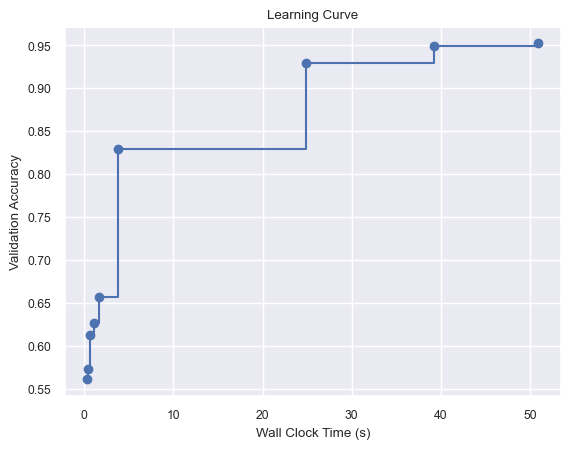

In [150]:
import matplotlib.pyplot as plt
import numpy as np

plt.title('Learning Curve')
plt.xlabel('Wall Clock Time (s)')
plt.ylabel('Validation Accuracy')
plt.scatter(time_history, 1 - np.array(valid_loss_history))
plt.step(time_history, 1 - np.array(best_valid_loss_history), where='post')
plt.show()

In [151]:
print(extree_tuned.feature_importances_)

[0.05485206 0.05864025 0.01425584 0.03136828 0.04162766 0.03147878
 0.0223519  0.03494946 0.02668635 0.03827841 0.01357866 0.04235785
 0.01058696 0.04043803 0.06684146 0.01716685 0.03430928 0.06279687
 0.06837576 0.01943574 0.03339732 0.03757251 0.02987035 0.02573597
 0.01072725 0.03608439 0.04078961 0.05544616]


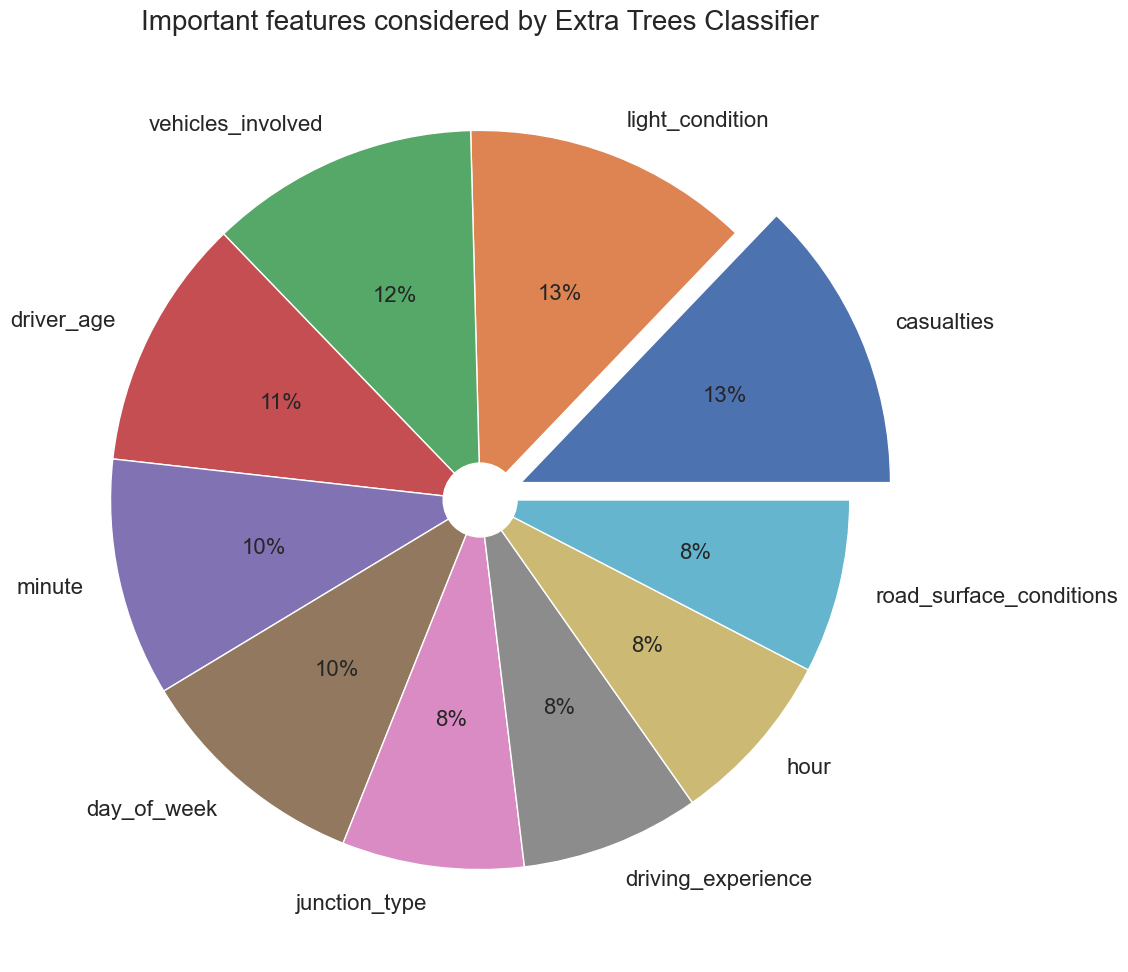

In [152]:
feat_importances = pd.Series(extree_tuned.feature_importances_, index=X.columns)
plt.figure(figsize=(12,12))
myexplode = [0.12,0,0,0,0,0,0,0,0,0]
plt.pie(feat_importances.nlargest(10),labels=feat_importances.nlargest(10).index, autopct='%.0f%%',explode= myexplode,
        textprops={'fontsize': 16})
centre_circle = plt.Circle((0,0),0.10,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Important features considered by Extra Trees Classifier',fontsize=20)
plt.show()

In [154]:
import joblib

In [155]:
joblib.dump(automl, 'auto_model.joblib')

['auto_model.joblib']

In [171]:
y_pred_tuned = extree_tuned.predict(X_test)

# Explaining model

In [156]:
model = joblib.load("auto_model.joblib")

In [159]:
import shap #(0.38.0>=)

In [160]:
shap.initjs()

In [165]:
X_sample = X_train.sample(100)
X_sample

day_of_week  driver_age  driver_sex  educational_level  \
18632            0           0           1                  4   
9427             1           3           1                  3   
19369            2           0           1                  2   
10766            3           0           1                  4   
18618            4           0           1                  4   
...            ...         ...         ...                ...   
14943            4           1           1                  2   
6256             1           4           0                  1   
20132            5           0           1                  4   
6052             3           3           1                  4   
20135            2           1           1                  4   

       driving_experience  vehicle_type  vehicle_owner  service_year  \
18632                   0             9              3             5   
9427                    2             9              3             5   
19369                   3             6              3             1   
10766                   3             7              3             2   
18618                   2             5              0             4   
...                   ...           ...            ...           ...   
14943                   1             0              3             5   
6256                    2             0              3             0   
20132                   3             0              3             5   
6052                    4             8              3             1   
20135                   0             7              3             5   

       accident_area  lanes  road_allignment  junction_type  surface_type  \
18632              8      2                5              7             0   
9427               6      0                5              6             0   
19369              8      1                5              7             0   
10766              4      2                5              7             0   
18618              5      2                5              7             0   
...              ...    ...              ...            ...           ...   
14943              8      1                5              7             0   
6256               7      4                5              1             0   
20132              4      2                5              7             0   
6052               7      2                5              7             0   
20135              6      1                4              1             0   

       road_surface_conditions  light_condition  weather_condition  \
18632                        0                3                  2   
9427                         0                2                  2   
19369                        1                3                  2   
10766                        1                1                  3   
18618                        0                3                  2   
...                        ...              ...                ...   
14943                        0                3                  2   
6256                         3                0                  4   
20132                        0                3                  2   
6052                         0                0                  2   
20135                        0                0                  2   

       collision_type  vehicles_involved  casualties  vehicle_movement  \
18632               8                  1           0                 2   
9427                8                  0           1                 2   
19369               8                  1           0                 3   
10766               8                  0           0                 2   
18618               8                  1           0                 2   
...               ...                ...         ...               ...   
14943               8                  0           0                 2   
625

In [166]:
shap_values = shap.TreeExplainer(extree_tuned).shap_values(X_sample)

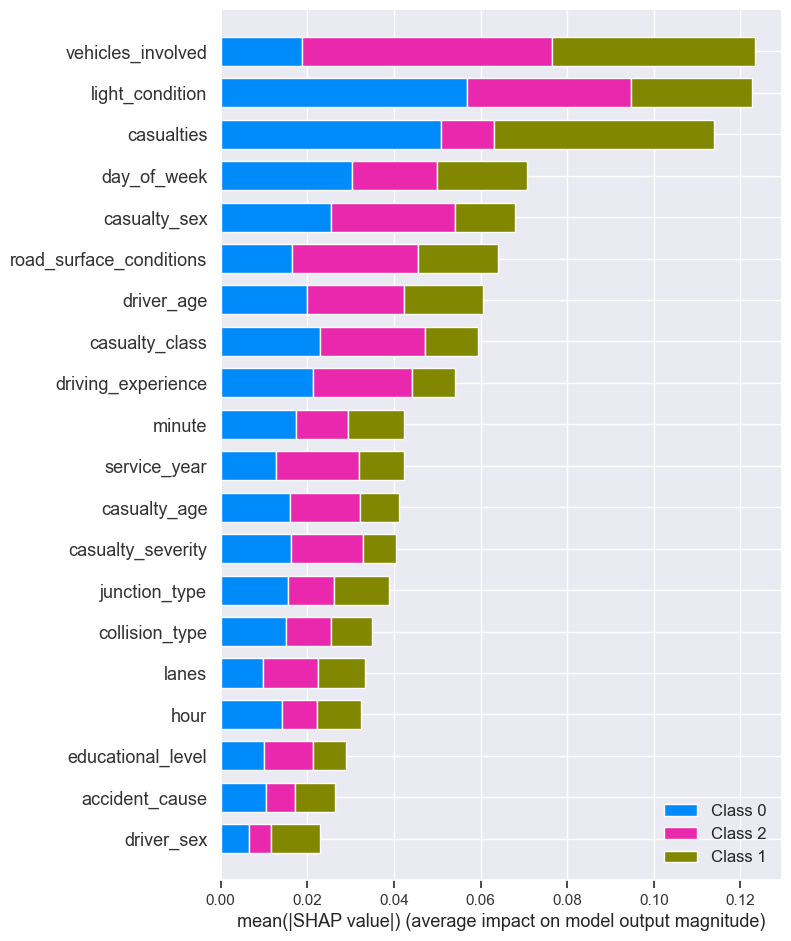

In [167]:
shap.summary_plot(shap_values, X_sample, plot_type="bar")

In [168]:
shap.force_plot(shap.TreeExplainer(extree_tuned).expected_value[0],
                shap_values[0][:], 
                X_sample)

In [172]:
print(y_pred_tuned[50])
shap.force_plot(shap.TreeExplainer(extree_tuned).expected_value[0], shap_values[1][50], X_sample.iloc[50])

2


In [176]:
i=13
print(y_pred_tuned[i])
shap.force_plot(shap.TreeExplainer(extree_tuned).expected_value[0], shap_values[0][i], X_sample.values[i], feature_names = X_sample.columns)

1


2


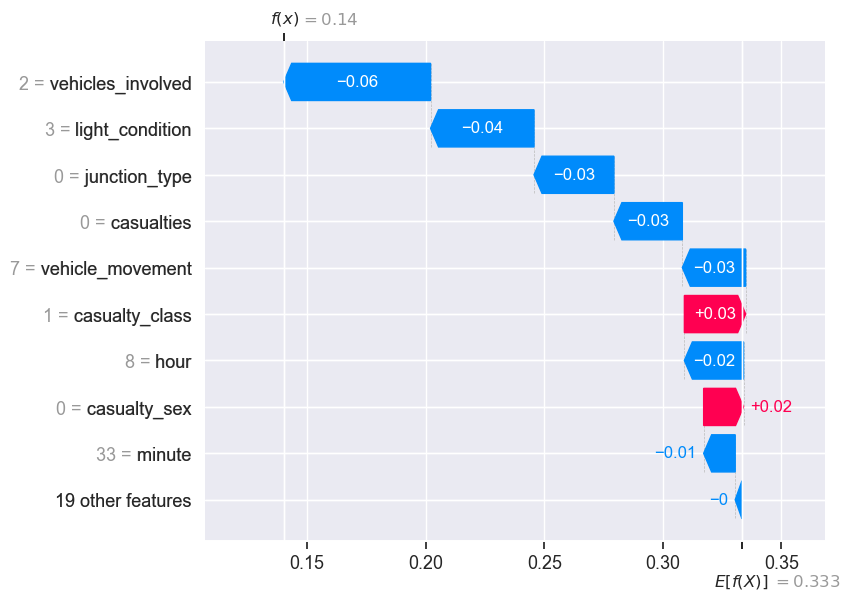

In [177]:
print(y_pred_tuned[10])
row = 10
shap.waterfall_plot(shap.Explanation(values=shap_values[0][row], 
                                              base_values=shap.TreeExplainer(extree_tuned).expected_value[0], data=X_sample.iloc[row],  
                                         feature_names=X_sample.columns.tolist()))

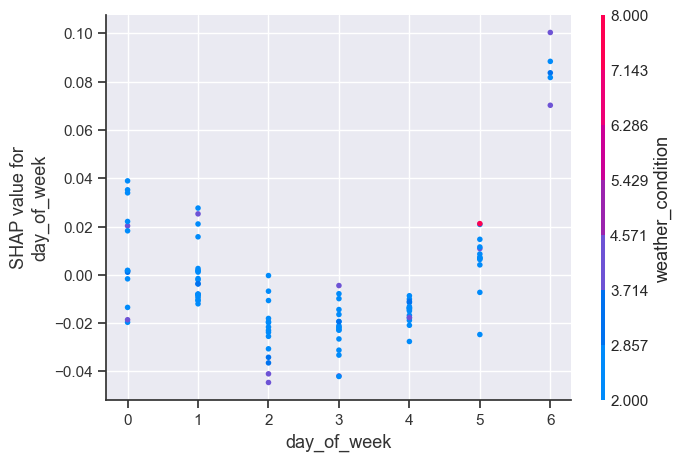

In [178]:
shap.dependence_plot('day_of_week', shap_values[2], X_sample)

2


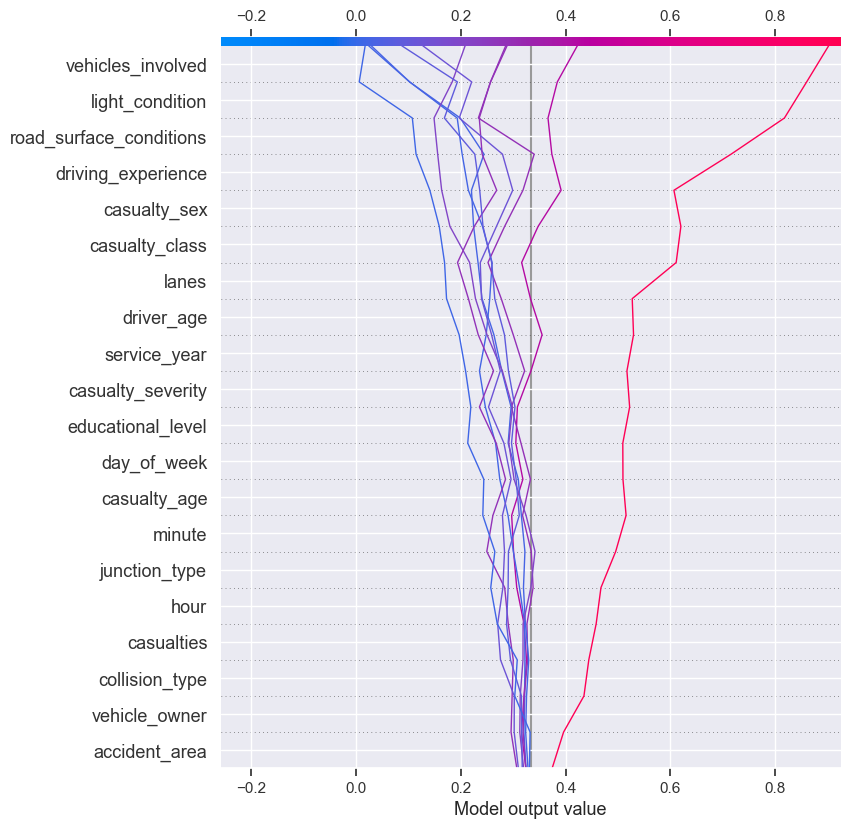

In [179]:
print(y_pred_tuned[10])
shap.decision_plot(shap.TreeExplainer(extree_tuned).expected_value[0], 
                   shap_values[2][:10], 
                   feature_names=X_sample.columns.tolist())